<a href="https://colab.research.google.com/github/Rotorid/House_Price_Predictor/blob/main/House_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Step 1: Import Libraries

# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing


In [2]:
### Step 2: Load and Explore Dataset

# Loading the California housing dataset
housing = fetch_california_housing()

# Creating a DataFrame from the data
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Adding the target column
df['MedHouseVal'] = housing.target

# Viewing the shape and first few rows
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
### Step 3: Describe and Check Missing Values

# View all column names
print("Columns in the dataset:")
print(df.columns)

# Get summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())




Columns in the dataset:
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.00

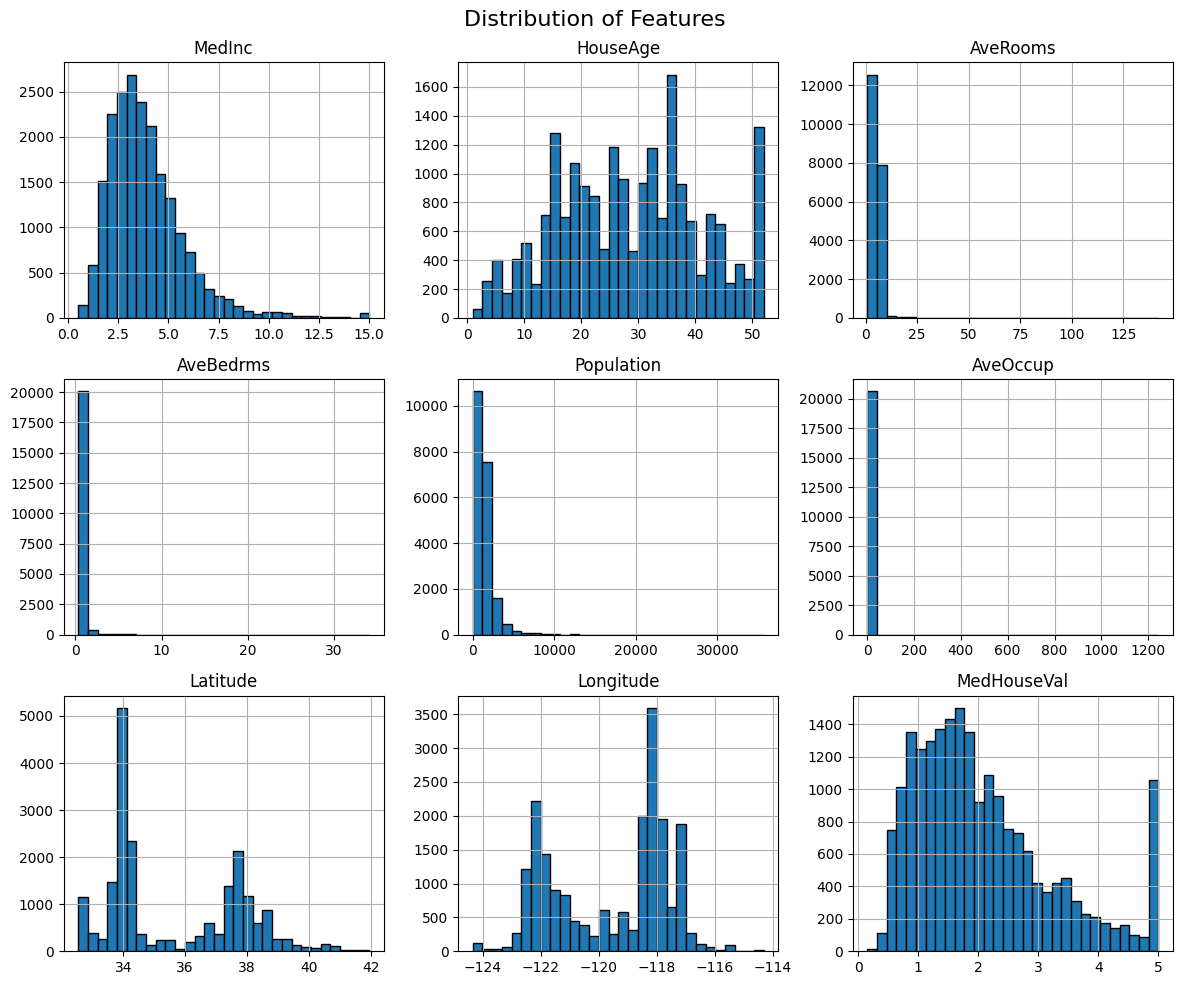

In [4]:
### Step 4: Visualize Feature Distributions

# Plot histograms for each feature
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Features", fontsize=16)
plt.tight_layout()
plt.show()


In [5]:
### Step 5: Compute the correlation matrix

correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedr

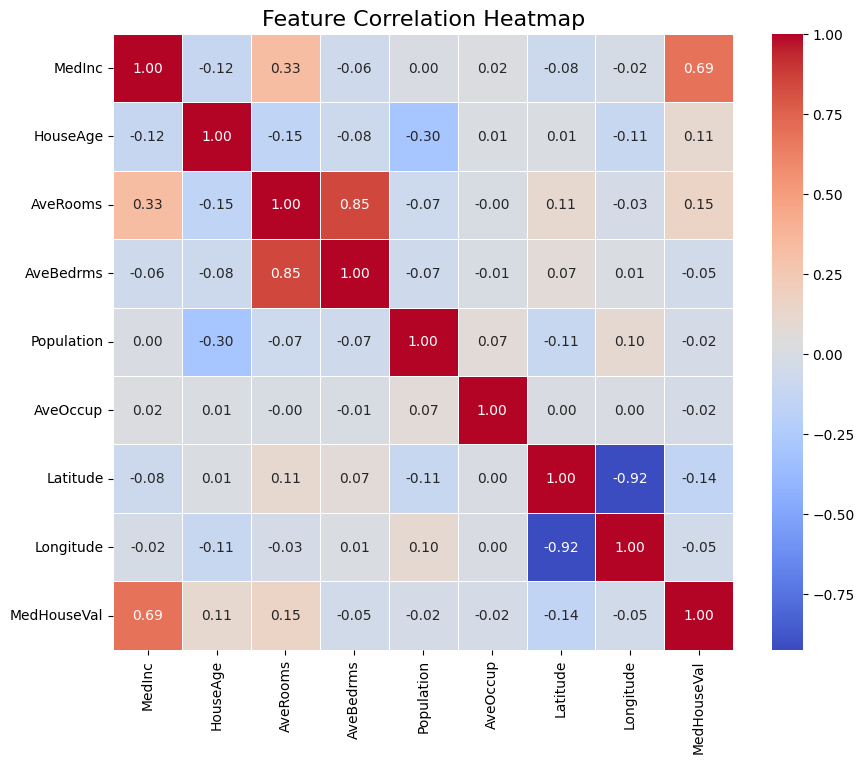

In [6]:
### Step 6: Visualize the correlation matrix using a heatmap

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title for clarity
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()



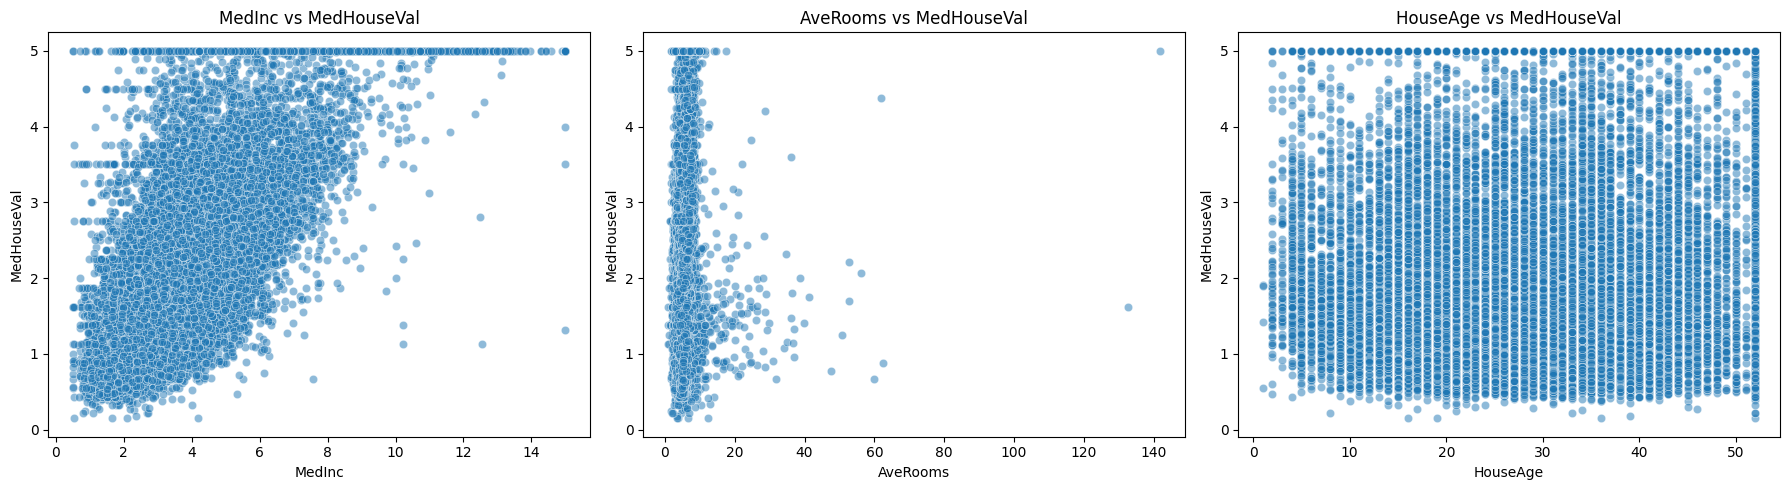

In [28]:
### Step 7: Scatter plots of top correlated features with target

# Set figure size
plt.figure(figsize=(18, 5))

# Scatter plot: Median Income vs House Value
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal', alpha=0.5)
plt.title("MedInc vs MedHouseVal")

# Scatter plot: AveRooms vs House Value
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='AveRooms', y='MedHouseVal', alpha=0.5)
plt.title("AveRooms vs MedHouseVal")

# Scatter plot: HouseAge vs House Value
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='HouseAge', y='MedHouseVal', alpha=0.5)
plt.title("HouseAge vs MedHouseVal")

plt.tight_layout()
plt.show()


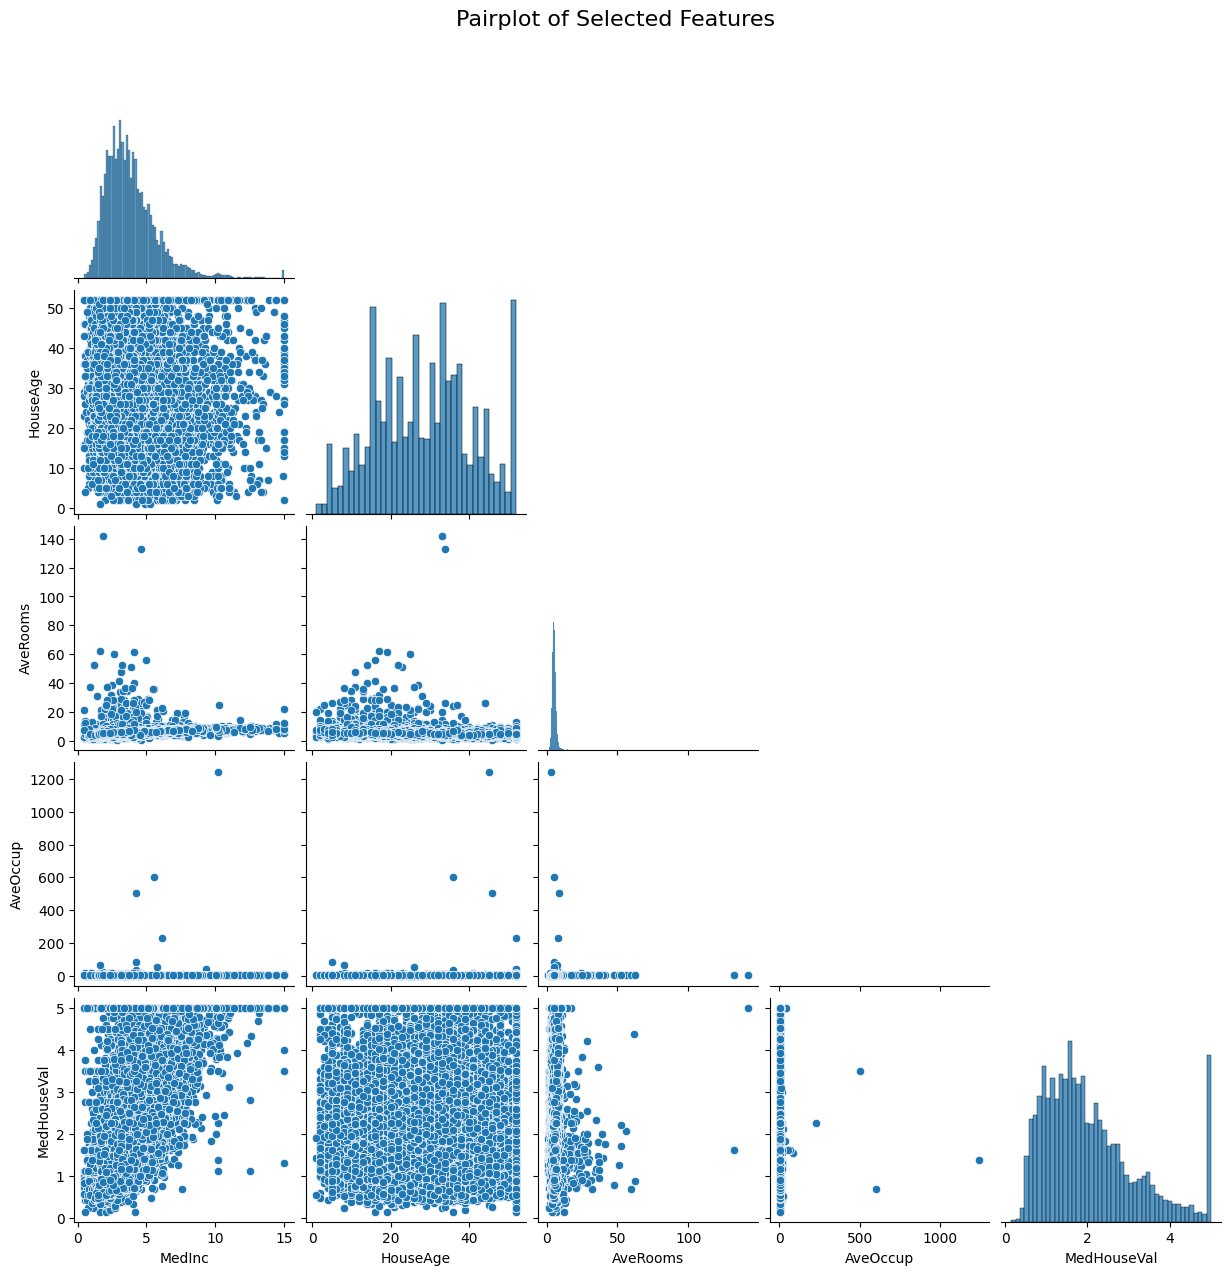

In [8]:
### Step 8: Pairplot to see feature relationships and distributions

# Select the most relevant features for the pairplot
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']

# Create the pairplot
sns.pairplot(df[selected_features], diag_kind='hist', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.show()


In [9]:
### Step 9: Select input features and target variable

# Input features (X) — removing the target column
X = df.drop('MedHouseVal', axis=1)

# Target column (y) — what we want to predict
y = df['MedHouseVal']


In [10]:
### Step 10: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (16512, 8)
Testing set shape: (4128, 8)


In [11]:
### Step 11: Normalize the feature data using StandardScaler

from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the first row to see what scaled data looks like
print("First row of scaled training data:", X_train_scaled[0])


First row of scaled training data: [-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
 -1.3728112   1.27258656]


In [12]:
### Step 12: Train a Linear Regression model on the training data

from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

print("Model training complete.")


Model training complete.


In [13]:
### Step 13: Evaluate model performance on test data

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {lr_mae:.3f}")
print(f"Mean Squared Error (MSE): {lr_mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.3f}")
print(f"R² Score: {lr_r2:.3f}")


Mean Absolute Error (MAE): 0.533
Mean Squared Error (MSE): 0.556
Root Mean Squared Error (RMSE): 0.746
R² Score: 0.576


In [14]:
### Step 14: Train and evaluate Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# Create and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict on test data
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluate performance
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree Regressor Results:")
print(f"MAE: {dt_mae:.3f}")
print(f"RMSE: {dt_rmse:.3f}")
print(f"R² Score: {dt_r2:.3f}")


Decision Tree Regressor Results:
MAE: 0.454
RMSE: 0.703
R² Score: 0.623


In [15]:
### Step 15: Train and evaluate Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate performance
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regressor Results:")
print(f"MAE: {rf_mae:.3f}")
print(f"RMSE: {rf_rmse:.3f}")
print(f"R² Score: {rf_r2:.3f}")


Random Forest Regressor Results:
MAE: 0.327
RMSE: 0.505
R² Score: 0.805


In [16]:
### Step 16: Train and evaluate KNN Regressor

from sklearn.neighbors import KNeighborsRegressor

# Create and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict on test data
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate performance
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_r2 = r2_score(y_test, knn_predictions)

print("K-Nearest Neighbors Regressor Results:")
print(f"MAE: {knn_mae:.3f}")
print(f"RMSE: {knn_rmse:.3f}")
print(f"R² Score: {knn_r2:.3f}")


K-Nearest Neighbors Regressor Results:
MAE: 0.446
RMSE: 0.658
R² Score: 0.670


In [17]:
### Step 17: Compare all model performances

# Create a dictionary of results
model_results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "KNN"],
    "MAE": [lr_mae, dt_mae, rf_mae, knn_mae],
    "RMSE": [lr_rmse, dt_rmse, rf_rmse, knn_rmse],
    "R² Score": [lr_r2, dt_r2, rf_r2, knn_r2]
}

# Create a DataFrame
results_df = pd.DataFrame(model_results)

# Display the DataFrame
print("Model Comparison:")
print(results_df)


Model Comparison:
               Model       MAE      RMSE  R² Score
0  Linear Regression  0.533200  0.745581  0.575788
1      Decision Tree  0.453904  0.702829  0.623042
2      Random Forest  0.327425  0.505143  0.805275
3                KNN  0.446154  0.657588  0.670010


In [18]:
### Step 18: Model Evaluation with Adjusted R²

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Number of samples and features
n = X_test.shape[0]
p = X_test.shape[1]

# Update model comparison with Adjusted R²
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, n, p)

    results.append([name, mae, rmse, r2, adj_r2])

# Create dataframe for comparison
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2", "Adjusted R2"])
print(results_df)


               Model       MAE      RMSE        R2  Adjusted R2
0  Linear Regression  0.533200  0.745581  0.575788     0.574964
1      Decision Tree  0.454679  0.703729  0.622076     0.621342
2      Random Forest  0.327543  0.505340  0.805123     0.804745
3      KNN Regressor  0.812798  1.057678  0.146310     0.144652


In [20]:
### Step 19: Hyperparameter Tuning with RandomizedSearchCV (Faster than GridSearch)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions for Random Forest
param_dist = {
    'n_estimators': randint(50, 200),       # number of trees
    'max_depth': [None, 10, 20],            # depth of trees
    'min_samples_split': randint(2, 10)     # minimum samples to split
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,        # number of random combinations to try
    cv=5,             # 5-fold cross-validation
    n_jobs=-1,        # use all CPU cores
    scoring='r2',     # optimize for R² score
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Print results
print("Best Parameters (RandomizedSearch):", random_search.best_params_)
print("Best Cross-Validation R² Score:", random_search.best_score_)


Best Parameters (RandomizedSearch): {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 142}
Best Cross-Validation R² Score: 0.8046557463667845


In [21]:
### Step 20: Train Final RandomForest with Best Parameters
best_params = random_search.best_params_

final_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Train on full training set
final_model.fit(X_train, y_train)

# Predict on test set
y_pred_final = final_model.predict(X_test)

# Evaluate
r2_final = r2_score(y_test, y_pred_final)
adj_r2_final = adjusted_r2(r2_final, X_test.shape[0], X_test.shape[1])

print("Final R² Score:", r2_final)
print("Final Adjusted R² Score:", adj_r2_final)


Final R² Score: 0.8050992604655466
Final Adjusted R² Score: 0.804720720548995


In [30]:
### Step 21: Final Model Comparison

# Add the tuned random forest results
final_mae = mean_absolute_error(y_test, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))

# Create a new row as DataFrame
new_row = pd.DataFrame([{
    "Model": "Tuned Random Forest",
    "MAE": final_mae,
    "RMSE": final_rmse,
    "R2": r2_final,
    "Adjusted R2": adj_r2_final
}])

# Concatenate with results_df
comparison_df = pd.concat([results_df, new_row], ignore_index=True)

print("Final Model Comparison:")
print(comparison_df)



Final Model Comparison:
                 Model       MAE      RMSE        R2  Adjusted R2
0    Linear Regression  0.533200  0.745581  0.575788     0.574964
1        Decision Tree  0.454679  0.703729  0.622076     0.621342
2        Random Forest  0.327543  0.505340  0.805123     0.804745
3        KNN Regressor  0.812798  1.057678  0.146310     0.144652
4  Tuned Random Forest  0.327866  0.505371  0.805099     0.804721


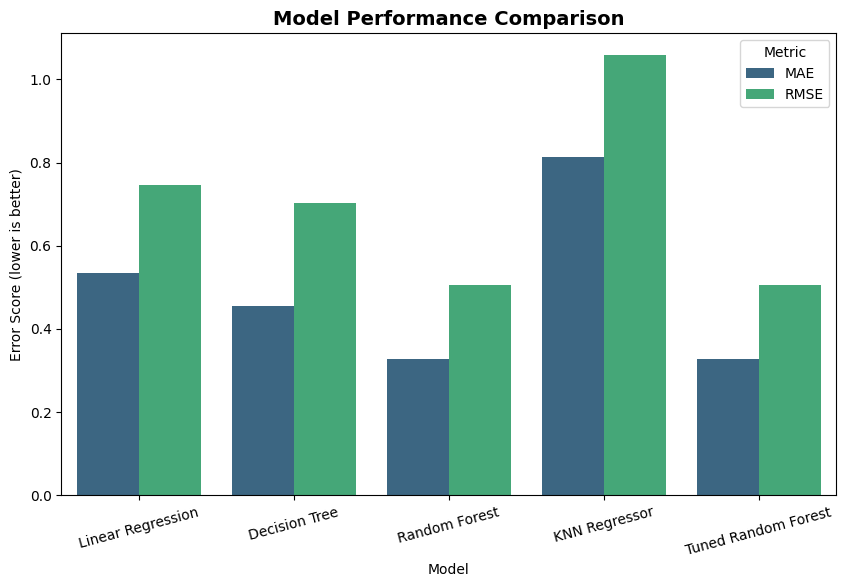

In [31]:
### Step 22: Visualizing Model Comparison

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10,6))

# Melt the dataframe for plotting (MAE & RMSE)
comparison_melted = comparison_df.melt(
    id_vars="Model", value_vars=["MAE", "RMSE"],
    var_name="Metric", value_name="Score"
)

# Barplot
sns.barplot(data=comparison_melted, x="Model", y="Score", hue="Metric", palette="viridis")

# Labels and styling
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.xlabel("Model")
plt.ylabel("Error Score (lower is better)")
plt.xticks(rotation=15)
plt.legend(title="Metric")
plt.show()
